In [0]:
!pip install python_speech_features

In [0]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank


In [0]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2, ncols=4, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(4):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


In [0]:
def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2, ncols=4, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(4):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


In [0]:
def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2, ncols=4, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(4):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


In [0]:
def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=4, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(4):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


In [0]:
def envelope(y, rate, threshold): #signal envelope
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window = int(rate/10), min_periods = 1, center = True).mean() #rolling window over data
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask


In [0]:
def calc_fft(y,rate): #magnitute + freq (fft is complex)
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate) #amonth of time passing between each sample
    Y = abs(np.fft.rfft(y)/n)#fft is complex, division to balance
    return(Y, freq)


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv("/content/gdrive/My Drive/instrumentswav.csv") #import excel
df.set_index('fname', inplace = True)


In [0]:
for f in df.index:
  if isinstance(f, str):
      print(f)
      rate, signal = wavfile.read('/content/gdrive/My Drive/wavfiles/'+f)
      df.at[f, 'length'] = signal.shape[0]/rate

k000002k.wav
k000005.wav
k000010.wav
k000140.wav
k000141.wav
k000148.wav
k000182.wav
k000190.wav
k000193.wav
k000194.wav
k000197.wav
k000200.wav
k000203.wav
k000204.wav
k000207.wav
k000210.wav
k000211.wav
k000212.wav
k000213.wav
k000255.wav
k000256.wav
k000368.wav
k000424.wav
k000459.wav
k000534.wav
k000540.wav
k000546.wav
k000574.wav
k000602.wav
k000615.wav
k000620.wav
k000621.wav
k000625.wav
k000666.wav
k000667.wav
k000676.wav
k000690.wav
k000694.wav
k000695.wav
k000704.wav
k000705.wav
k000706.wav
k000707.wav
k000708.wav
k000709.wav
k000714.wav
k000715.wav
k000716.wav
k000718.wav
k000777.wav
k000814.wav
k000821.wav
k000822.wav
k000825.wav
k000853.wav
k000890.wav
k000892.wav
k000897.wav
k000993.wav
k000995.wav
k000997.wav
k000998.wav
k001039.wav
k001040.wav
k001066.wav
k001069.wav
k001073.wav
k001075.wav
k001082.wav
k001083.wav
k001087.wav
k001102.wav
k001193.wav
k001195.wav
k001196.wav
k001197.wav
k001249.wav
k001259.wav
k001270.wav
k001276.wav
k001277.wav
k001278.wav
k001417.wav
k00

In [0]:
classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()#middle length of each one


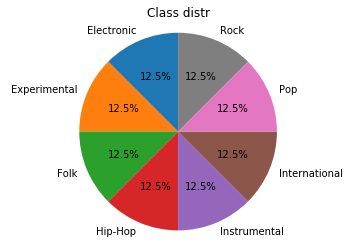

In [0]:
fig, ax = plt.subplots()
ax.set_title('Class distr', y=1.00)
ax.pie(class_dist, labels = class_dist.index, autopct='%1.1f%%', shadow = False, startangle = 90)  
ax.axis('equal') #for circle
plt.show()
df.reset_index(inplace=True)


In [0]:
signals = {}
fft = {}
fbank = {}
mfccs = {}


In [0]:
for c in classes:
    wav_file = df[df.label ==c].iloc[0,0] #condition -0 ind, 0 col
    signal, rate = librosa.load('/content/gdrive/My Drive/wavfiles/'+wav_file, sr = 44100) #sampling rate
    mask = envelope(signal, rate, 0.0005) #can toggle 0.0005
    signal = signal[mask] #remove noise
    signals[c]=signal
    fft[c] = calc_fft(signal, rate)

    bank = logfbank(signal[:rate], rate, nfilt = 26, nfft = 1103).T #filterbank from pyspeechfeat, show a sec of data. nfft - calculated, short time Fourier trans
    fbank[c]=bank
    mel = mfcc(signal[:rate],rate,numcep=13, nfilt =26, nfft = 1103).T#calculated after discete cosine transform
    mfccs[c] = mel


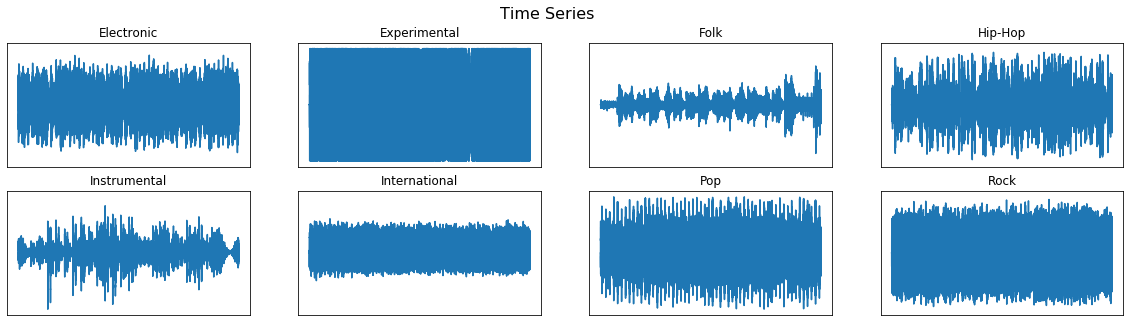

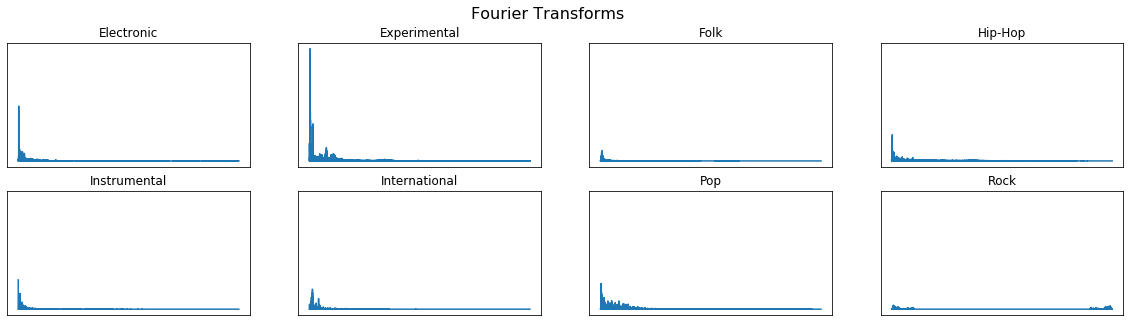

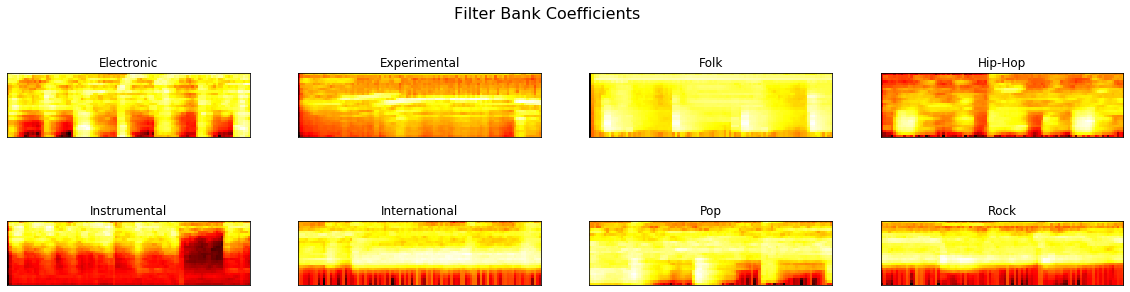

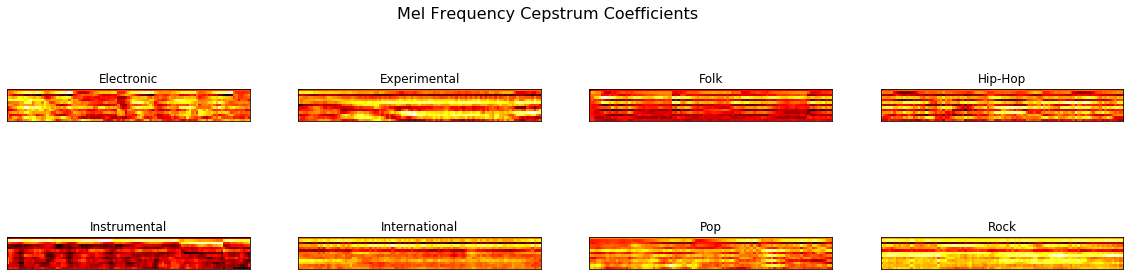

In [0]:
plot_signals(signals) #remove dead spaces
plt.show()

plot_fft(fft) #fourier
plt.show()

plot_fbank(fbank) #filterbank energies
plt.show()

plot_mfccs(mfccs) 

plt.show()


In [0]:
if len(os.listdir('/content/gdrive/My Drive/clean'))==0:
    for f in tqdm(df.fname):
        signal, rate = librosa.load('/content/gdrive/My Drive/wavfiles/' + f, sr = 16000) #screw highfreq
        mask = envelope(signal, rate, 0.0005) #clean up the junk 
        wavfile.write(filename='/content/gdrive/My Drive/clean/'+f, rate = rate, data= signal[mask])
